<a href="https://colab.research.google.com/github/eebjwa/SENSE_GEE_TEAM3/blob/main/max_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
# Trigger authentication
ee.Authenticate()
# Initialise library
ee.Initialize()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=Hjqt318PxpBLv9RxnYYMLyuR7Cda3bQPo11Igm0HYuk&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/5gEn5yUnIkb_uf9h9u2RDmGRFgV9EjOOr1VgLJ_5nHDZtp_v8StaL9M

Successfully saved authorization token.


In [ ]:
# Create a variable containing the polygon for the region of interest
roi = ee.Geometry.Polygon(
        [[[-74.60668900677238, 20.088333497505946],
          [-74.60668900677238, 17.687361057873034],
          [-68.11376908489738, 17.687361057873034],
          [-68.11376908489738, 20.088333497505946]]])


In [ ]:
# Find imagery from MODIS for Hispaniola study area, define timespan of data 
# Data addresss: https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1#description

modisNDVI = ee.ImageCollection('MODIS/006/MOD13Q1').select('NDVI')

modisEVI = ee.ImageCollection('MODIS/006/MOD13Q1').select('EVI')

# Ignore the section below
#modisGlobal = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(ee.Geometry.Polygon((
#        [[[-74.60668900677238, 20.088333497505946],
#          [-74.60668900677238, 17.687361057873034],
#          [-68.11376908489738, 17.687361057873034],
#          [-68.11376908489738, 20.088333497505946]]])
#)).filterDate('2019-01-01', '2019-12-31').sort('MODLAND QA Bits').first()

In [ ]:
# Filter the data - do we want to filter to only the summer months?

In [ ]:
# Calculate annual averages for both NDVI and EVI for the ROI
def annualAverage(year, imageCollection):
    annualImagery = imageCollection.filterDate(str(year) + '-01-01', str(year) + '-12-31')
    return annualImagery.mean()  


In [ ]:
averageNDVI00 = annualAverage(2000, modisNDVI)
averageNDVI01 = annualAverage(2001, modisNDVI)
averageNDVI02 = annualAverage(2002, modisNDVI)
averageNDVI03 = annualAverage(2003, modisNDVI)
averageNDVI04 = annualAverage(2004, modisNDVI)
averageNDVI05 = annualAverage(2005, modisNDVI)
averageNDVI06 = annualAverage(2006, modisNDVI)
averageNDVI07 = annualAverage(2007, modisNDVI)
averageNDVI08 = annualAverage(2008, modisNDVI)
averageNDVI09 = annualAverage(2009, modisNDVI)
averageNDVI10 = annualAverage(2010, modisNDVI)
averageNDVI11 = annualAverage(2011, modisNDVI)
averageNDVI12 = annualAverage(2012, modisNDVI)
averageNDVI13 = annualAverage(2013, modisNDVI)
averageNDVI14 = annualAverage(2014, modisNDVI)
averageNDVI15 = annualAverage(2015, modisNDVI)
averageNDVI16 = annualAverage(2016, modisNDVI)
averageNDVI17 = annualAverage(2017, modisNDVI)
averageNDVI18 = annualAverage(2018, modisNDVI)
averageNDVI19 = annualAverage(2019, modisNDVI)
averageNDVI20 = annualAverage(2020, modisNDVI)

In [ ]:
## Clip to Dominican Republic and Haiti

# Data source for country polygons: https://developers.google.com/earth-engine/datasets/catalog/USDOS_LSIB_SIMPLE_2017
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

# Filter the featurecollection to give just a Haiti polygon
haiti = countries.filter(ee.Filter.eq('country_na', 'Haiti'))
# Filter the featurecollection to give just a Dominican Republic polygon
domRep = countries.filter(ee.Filter.eq('country_na', 'Dominican Republic'))

In [ ]:
## Clip imagery to Haiti and domRep
hAverNDVI00 = averageNDVI12.clip(haiti)
hAverNDVI01 = averageNDVI01.clip(haiti)
hAverNDVI02 = averageNDVI02.clip(haiti)
hAverNDVI03 = averageNDVI03.clip(haiti)
hAverNDVI04 = averageNDVI04.clip(haiti)
hAverNDVI05 = averageNDVI05.clip(haiti)
hAverNDVI06 = averageNDVI06.clip(haiti)
hAverNDVI07 = averageNDVI07.clip(haiti)
hAverNDVI08 = averageNDVI08.clip(haiti)
hAverNDVI09 = averageNDVI09.clip(haiti)
hAverNDVI10 = averageNDVI10.clip(haiti)
hAverNDVI11 = averageNDVI11.clip(haiti)
hAverNDVI12 = averageNDVI12.clip(haiti)
hAverNDVI13 = averageNDVI13.clip(haiti)
hAverNDVI14 = averageNDVI14.clip(haiti)
hAverNDVI15 = averageNDVI15.clip(haiti)
hAverNDVI16 = averageNDVI16.clip(haiti)
hAverNDVI17 = averageNDVI17.clip(haiti)
hAverNDVI18 = averageNDVI18.clip(haiti)
hAverNDVI19 = averageNDVI19.clip(haiti)
hAverNDVI20 = averageNDVI20.clip(haiti)

dAverNDVI00 = averageNDVI00.clip(domRep)
dAverNDVI01 = averageNDVI01.clip(domRep)
dAverNDVI02 = averageNDVI02.clip(domRep)
dAverNDVI03 = averageNDVI03.clip(domRep)
dAverNDVI04 = averageNDVI04.clip(domRep)
dAverNDVI05 = averageNDVI05.clip(domRep)
dAverNDVI06 = averageNDVI06.clip(domRep)
dAverNDVI07 = averageNDVI07.clip(domRep)
dAverNDVI08 = averageNDVI08.clip(domRep)
dAverNDVI09 = averageNDVI09.clip(domRep)
dAverNDVI10 = averageNDVI10.clip(domRep)
dAverNDVI11 = averageNDVI11.clip(domRep)
dAverNDVI12 = averageNDVI12.clip(domRep)
dAverNDVI13 = averageNDVI13.clip(domRep)
dAverNDVI14 = averageNDVI14.clip(domRep)
dAverNDVI15 = averageNDVI15.clip(domRep)
dAverNDVI16 = averageNDVI16.clip(domRep)
dAverNDVI17 = averageNDVI17.clip(domRep)
dAverNDVI18 = averageNDVI18.clip(domRep)
dAverNDVI19 = averageNDVI19.clip(domRep)
dAverNDVI20 = averageNDVI20.clip(domRep)

In [ ]:

mean_ha_00 = hAverNDVI00.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_00',mean_ha_00.getInfo())
mean_ha_01 = hAverNDVI01.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_01',mean_ha_01.getInfo())
mean_ha_02 = hAverNDVI02.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_02',mean_ha_02.getInfo())
mean_ha_03 = hAverNDVI03.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_03',mean_ha_03.getInfo())
mean_ha_04 = hAverNDVI04.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_04',mean_ha_04.getInfo())
mean_ha_05 = hAverNDVI05.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_05',mean_ha_05.getInfo())
mean_ha_06 = hAverNDVI06.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_06',mean_ha_06.getInfo())
mean_ha_07 = hAverNDVI07.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_07',mean_ha_07.getInfo())
mean_ha_08 = hAverNDVI08.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_08',mean_ha_08.getInfo())
mean_ha_09 = hAverNDVI09.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_09',mean_ha_09.getInfo())
mean_ha_10 = hAverNDVI10.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_10',mean_ha_10.getInfo())
mean_ha_11 = hAverNDVI11.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_11',mean_ha_11.getInfo())
mean_ha_12 = hAverNDVI12.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_12',mean_ha_12.getInfo())
mean_ha_13 = hAverNDVI13.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_13',mean_ha_13.getInfo())
mean_ha_14 = hAverNDVI14.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_14',mean_ha_14.getInfo())
mean_ha_15 = hAverNDVI15.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_15',mean_ha_15.getInfo())
mean_ha_16 = hAverNDVI16.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_16',mean_ha_16.getInfo())
mean_ha_17 = hAverNDVI17.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_17',mean_ha_17.getInfo())
mean_ha_18 = hAverNDVI18.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_18',mean_ha_18.getInfo())
mean_ha_19 = hAverNDVI19.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_19',mean_ha_19.getInfo())
mean_ha_20 = hAverNDVI20.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': haiti.geometry(),'scale': 500,'maxPixels': 1e9})
print('haiti_20',mean_ha_20.getInfo())

haiti_00 {'NDVI': 6020.365355953348}
haiti_01 {'NDVI': 5916.586150645651}
haiti_02 {'NDVI': 5844.815596185704}
haiti_03 {'NDVI': 5968.69383651047}
haiti_04 {'NDVI': 5952.157180295336}
haiti_05 {'NDVI': 6011.403741701945}
haiti_06 {'NDVI': 6102.434943424451}
haiti_07 {'NDVI': 6242.899787244019}
haiti_08 {'NDVI': 6039.874859401476}
haiti_09 {'NDVI': 6022.746230900918}
haiti_10 {'NDVI': 6252.10545856851}
haiti_11 {'NDVI': 6094.1184457828285}
haiti_12 {'NDVI': 6020.365355953348}
haiti_13 {'NDVI': 6025.107449930302}
haiti_14 {'NDVI': 5898.790066418578}
haiti_15 {'NDVI': 5816.17561318726}
haiti_16 {'NDVI': 6061.314070543031}
haiti_17 {'NDVI': 6352.776410225924}
haiti_18 {'NDVI': 6237.283324585552}
haiti_19 {'NDVI': 6123.996513686193}
haiti_20 {'NDVI': 5992.436154630967}


In [ ]:
mean_dr_00 = dAverNDVI00.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_00',mean_dr_00.getInfo())
mean_dr_01 = dAverNDVI01.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_01',mean_dr_01.getInfo())
mean_dr_02 = dAverNDVI02.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_02',mean_dr_02.getInfo())
mean_dr_03 = dAverNDVI03.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_03',mean_dr_03.getInfo())
mean_dr_04 = dAverNDVI04.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_04',mean_dr_04.getInfo())
mean_dr_05 = dAverNDVI05.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_05',mean_dr_05.getInfo())
mean_dr_06 = dAverNDVI06.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_06',mean_dr_06.getInfo())
mean_dr_07 = dAverNDVI07.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_07',mean_dr_07.getInfo())
mean_dr_08 = dAverNDVI08.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_08',mean_dr_08.getInfo())
mean_dr_09 = dAverNDVI09.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_09',mean_dr_09.getInfo())
mean_dr_10 = dAverNDVI10.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_10',mean_dr_10.getInfo())
mean_dr_11 = dAverNDVI11.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_11',mean_dr_11.getInfo())
mean_dr_12 = dAverNDVI12.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_12',mean_dr_12.getInfo())
mean_dr_13 = dAverNDVI13.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_13',mean_dr_13.getInfo())
mean_dr_14 = dAverNDVI14.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_14',mean_dr_14.getInfo())
mean_dr_15 = dAverNDVI15.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_15',mean_dr_15.getInfo())
mean_dr_16 = dAverNDVI16.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_16',mean_dr_16.getInfo())
mean_dr_17 = dAverNDVI17.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_17',mean_dr_17.getInfo())
mean_dr_18 = dAverNDVI18.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_18',mean_dr_18.getInfo())
mean_dr_19 = dAverNDVI19.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_19',mean_dr_19.getInfo())
mean_dr_20 = dAverNDVI20.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': domRep.geometry(),'scale': 500,'maxPixels': 1e9})
print('dompre_20',mean_dr_20.getInfo())

dompre_00 {'NDVI': 6367.834101343071}
dompre_01 {'NDVI': 6448.346773969685}
dompre_02 {'NDVI': 6500.8736558401415}
dompre_03 {'NDVI': 6617.880044802378}
dompre_04 {'NDVI': 6802.761252662101}
dompre_05 {'NDVI': 6751.2295031048625}
dompre_06 {'NDVI': 6938.887569233519}
dompre_07 {'NDVI': 6824.477978808257}
dompre_08 {'NDVI': 6803.812543466582}
dompre_09 {'NDVI': 6784.863320902186}
dompre_10 {'NDVI': 6784.42558955278}
dompre_11 {'NDVI': 6792.470869579324}
dompre_12 {'NDVI': 6851.029415953655}
dompre_13 {'NDVI': 6744.96796243087}
dompre_14 {'NDVI': 6583.6289088747335}
dompre_15 {'NDVI': 6424.784594468196}
dompre_16 {'NDVI': 6786.824151239892}
dompre_17 {'NDVI': 7054.2666580976265}
dompre_18 {'NDVI': 6796.681049240139}
dompre_19 {'NDVI': 6681.94458251321}
dompre_20 {'NDVI': 6648.651314240303}


In [ ]:
years=[2000 , 2001 , 2002 , 2003 , 2004 , 2005 , 2006 , 2007 , 2008 , 2009 , 2010 , 2011 , 2012 , 2013 , 2014 , 2015 , 2016 , 2017 , 2018 , 2019 , 2020]
Haiti=[6020.36 , 5916.58 , 5844.81 , 5968.69 , 5952.15 , 6011.40 , 6102.43 , 6242.89 , 6039.87 , 6022.74 , 6252.10 , 6094.11 , 6020.36 , 6025.10 , 5898.79 , 5816.17 , 6061.31 , 6352.77 , 6237.28 , 6123.99 , 5992.43]
DomRe=[6367.83 , 6448.34 , 6500.87 , 6617.88 , 6802.76 , 6751.22 , 6938.88 , 6824.47 , 6803.81 , 6784.86 , 6784.42 , 6792.47 , 6851.02 , 6744.96 , 6583.62 , 6424.78 , 6786.82 , 7054.26 , 6796.68 , 6681.94 , 6648.65]
print('years',years)
print('Haiti',Haiti)
print('DomRe',DomRe)
print(len(years))
print(len(Haiti))
print(len(DomRe))

years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Haiti [6020.36, 5916.58, 5844.81, 5968.69, 5952.15, 6011.4, 6102.43, 6242.89, 6039.87, 6022.74, 6252.1, 6094.11, 6020.36, 6025.1, 5898.79, 5816.17, 6061.31, 6352.77, 6237.28, 6123.99, 5992.43]
DomRe [6367.83, 6448.34, 6500.87, 6617.88, 6802.76, 6751.22, 6938.88, 6824.47, 6803.81, 6784.86, 6784.42, 6792.47, 6851.02, 6744.96, 6583.62, 6424.78, 6786.82, 7054.26, 6796.68, 6681.94, 6648.65]
21
21
21


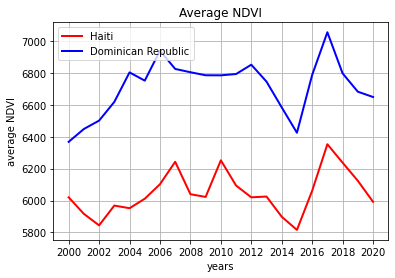

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots() # calling subplots without any arguments creates a one axes by default
axes.plot(years, Haiti, color='r', linewidth=2.0, linestyle='-',alpha=1, label='Haiti');
axes.plot(years, DomRe, color='b', linewidth=2.0, linestyle='-',alpha=1, label='Dominican Republic');
axes.grid(True)
axes.set_title('Average NDVI');
axes.legend(loc='upper left', );
xticks(np.arange(2000, 2021, step=2));
axes.set(ylabel="average NDVI",xlabel="years");

[Text(0, 0.5, 'average NDVI'), Text(0.5, 0, 'years')]

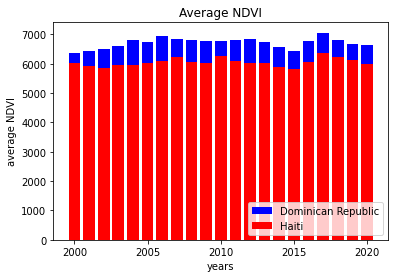

In [ ]:
fig, axes = plt.subplots() # calling subplots without any arguments creates a one axes by default
axes.bar(years, DomRe, color='b', label='Dominican Republic')
axes.bar(years, Haiti, color='r', label='Haiti')
axes.set_title('Average NDVI')
axes.legend(loc='lower right');
axes.set(ylabel="average NDVI",xlabel="years")

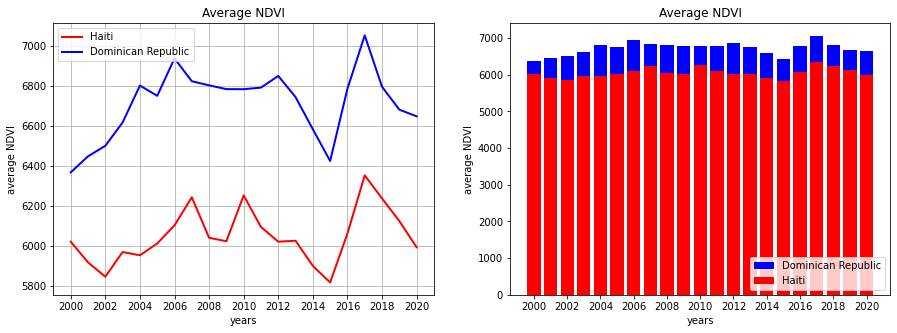

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].plot(years, Haiti, color='r', linewidth=2.0, linestyle='-',alpha=1, label='Haiti');
axes[0].plot(years, DomRe, color='b', linewidth=2.0, linestyle='-',alpha=1, label='Dominican Republic');
axes[0].grid(True)
axes[0].set_title('Average NDVI');
axes[0].legend(loc='upper left', );
axes[0].set(ylabel="average NDVI",xlabel="years");


axes[1].bar(years, DomRe, color='b', label='Dominican Republic')
axes[1].bar(years, Haiti, color='r', label='Haiti')
axes[1].set_title('Average NDVI')
axes[1].legend(loc='lower right');
axes[1].set(ylabel="average NDVI",xlabel="years");
plt.setp(axes, xticks=np.arange(2000, 2021, step=2))
plt.savefig('average_NDVI_subplot.png',dpi=300,transparent=True,bbox_inches='tight')

In [ ]:
# View the imagery 
import folium
!pip install geehydro # Life saver for plotting GEE stuff with Python!
import geehydro
#print(points.getInfo())
# Use folium to visualize the imagery.
map = folium.Map(location=[19.002869, -71.083427],zoom_start= 8) 
map.addLayer(hAverNDVI08, {'min':0,'max':10000,'bands': ['NDVI'],'palette': ['000000', '66FF00'], 'opacity':1}, 'hAverNDVI05')
folium.LayerControl().add_to(map)
map

In [ ]:
print(series)

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_1_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Element.set",
              "arguments": {
                "key": {
                  "constantValue": "system:time_start"
                },
                "object": {
                  "functionInvocationValue": {
                    "functionName": "Image.subtract",
                    "arguments": {
                      "image1": {
                        "argumentReference": "_MAPPING_VAR_1_0"
                      },
                      "image2": {
                        "functionInvocationValue": {
                          "functionName": "reduce.mean",
                          "arguments": {
                            "collection": {
      

ee.imagecollection.ImageCollection